In [1]:
from stream_topic.models import StructuralETM, StructuralCTM
from stream_topic.utils import TMDataset

/Users/antonthielmann/Desktop/projects/STREAM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/antonthielmann/Desktop/projects/STREAM/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = TMDataset()
dataset.fetch_dataset("Poliblogs")

2025-01-11 13:01:18.578 | INFO     | stream_topic.utils.dataset:fetch_dataset:119 - Fetching dataset: Poliblogs
2025-01-11 13:01:18.847 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:331 - Downloading dataset from github
2025-01-11 13:01:19.622 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:333 - Dataset downloaded successfully at ~/stream_topic_data/
2025-01-11 13:01:20.270 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:361 - Downloading dataset info from github
2025-01-11 13:01:20.535 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:363 - Dataset info downloaded successfully at ~/stream_topic_data/


In [3]:
dataset.preprocess("ETM")

Preprocessing documents: 100%|██████████| 13246/13246 [01:00<00:00, 219.43it/s]


In [4]:
model = StructuralCTM()
model.fit(dataset, max_epochs=3, n_topics=5)

2025-01-11 13:02:21.546 | INFO     | stream_topic.models.abstract_helper_models.base:prepare_embeddings:212 - --- Loading precomputed paraphrase-MiniLM-L3-v2 embeddings ---
2025-01-11 13:02:21.644 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:302 - Downloading embeddings from github
2025-01-11 13:02:22.455 | INFO     | stream_topic.utils.data_downloader:load_custom_dataset_from_url:304 - Embeddings  downloaded successfully at ~/stream_topic_data/
2025-01-11 13:02:22.462 | INFO     | stream_topic.models.sctm:_initialize_datamodule:315 - --- Initializing Datamodule for StructuralCTM ---
2025-01-11 13:02:24.088 | INFO     | stream_topic.models.sctm:_initialize_trainer:274 - --- Initializing Trainer for StructuralCTM ---
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (mps), used: True
TPU available: False, using

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/antonthielmann/Desktop/projects/STREAM/.venv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


/Users/antonthielmann/Desktop/projects/STREAM/.venv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 2: 100%|██████████| 332/332 [00:10<00:00, 33.02it/s, v_num=12, train_loss_step=2.8e+3, val_loss_step=2.84e+3, val_loss_epoch=2.41e+3, train_loss_epoch=2.34e+3] 

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 332/332 [00:10<00:00, 32.54it/s, v_num=12, train_loss_step=2.8e+3, val_loss_step=2.84e+3, val_loss_epoch=2.41e+3, train_loss_epoch=2.34e+3]


2025-01-11 13:02:55.797 | INFO     | stream_topic.models.sctm:fit:478 - --- Training completed successfully. ---
/Users/antonthielmann/Desktop/projects/STREAM/stream_topic/models/sctm.py:491: RuntimeWarning: invalid value encountered in divide
  self.theta = self.theta / self.theta.sum(axis=1, keepdims=True)


In [5]:
a, b, c = model.model.model.plotting_preds(model.data_module)

In [6]:
b[1].shape

(10596, 5)

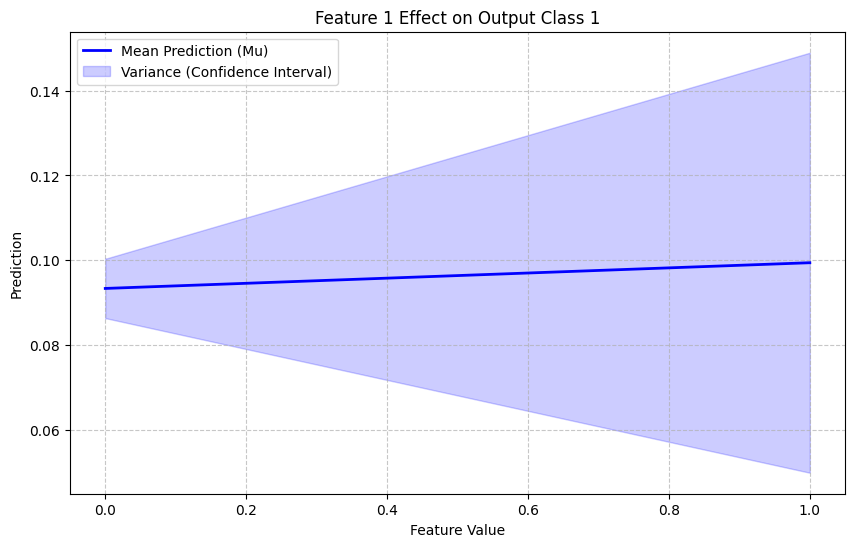

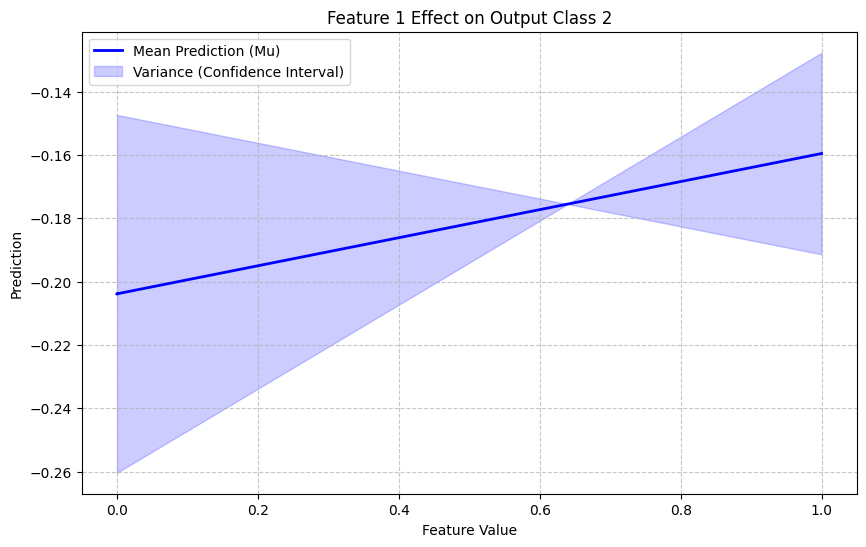

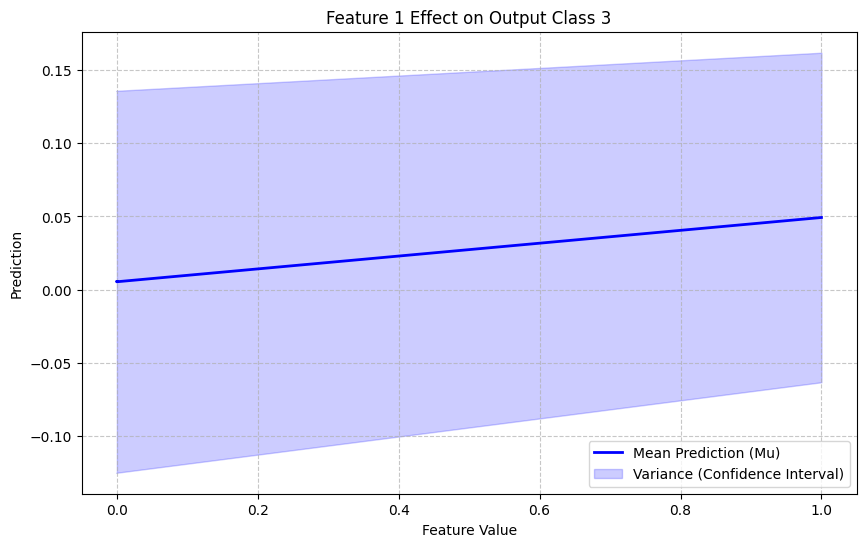

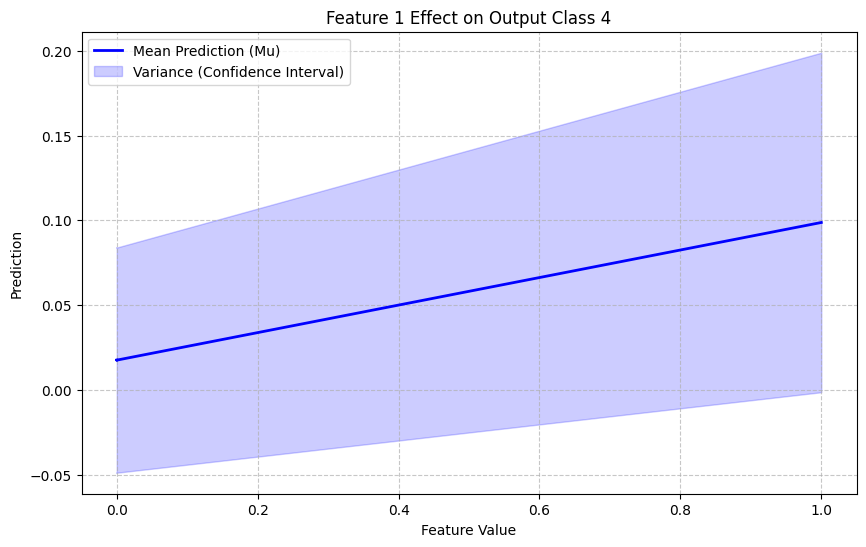

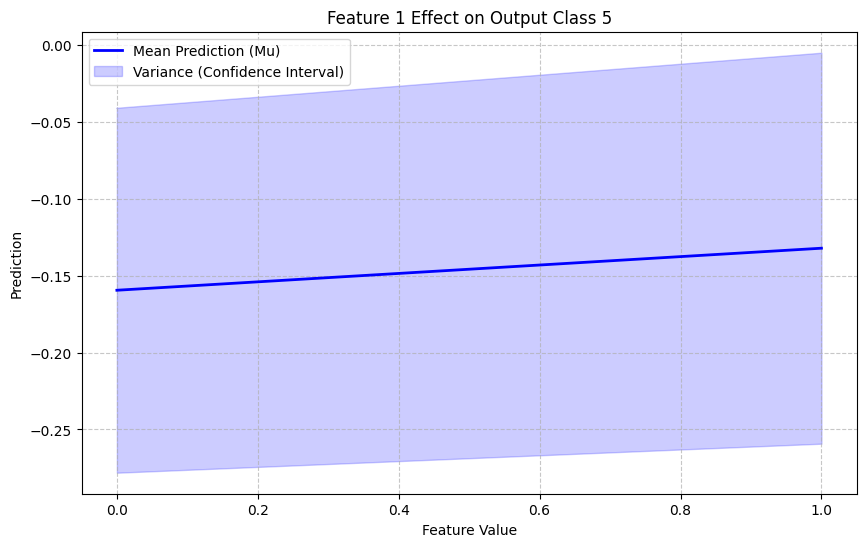

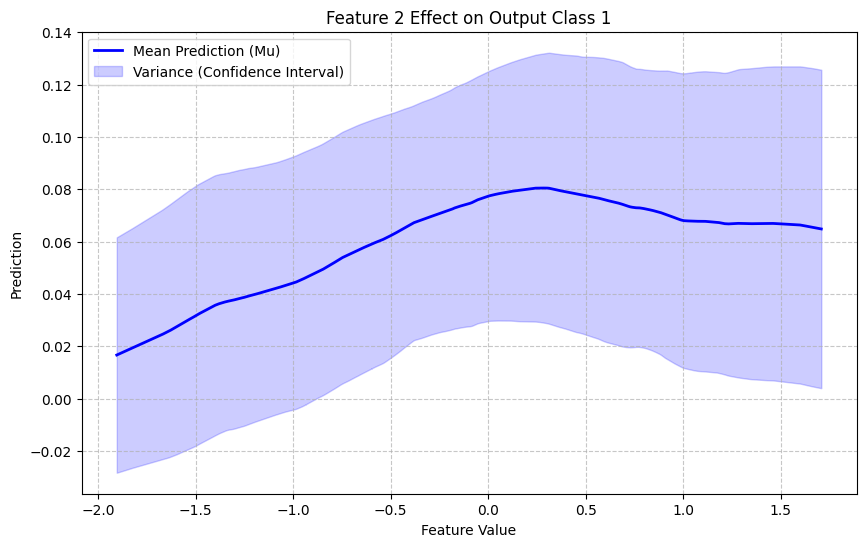

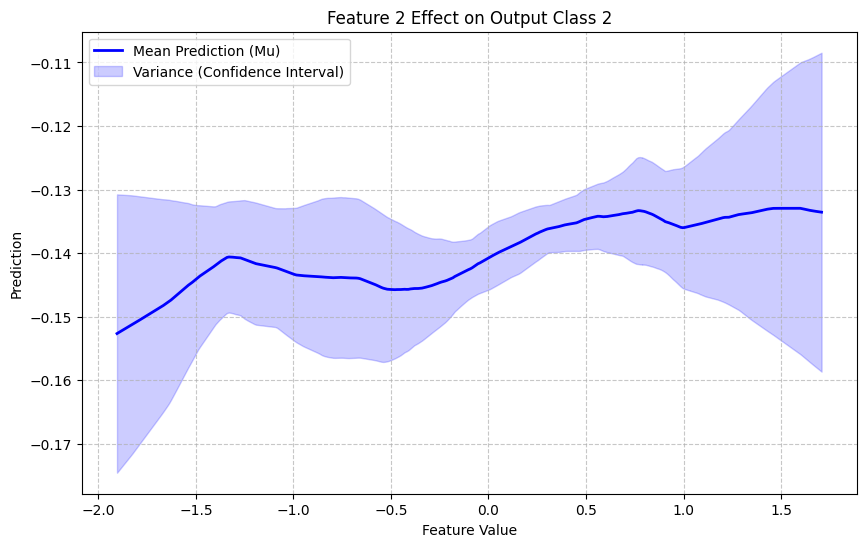

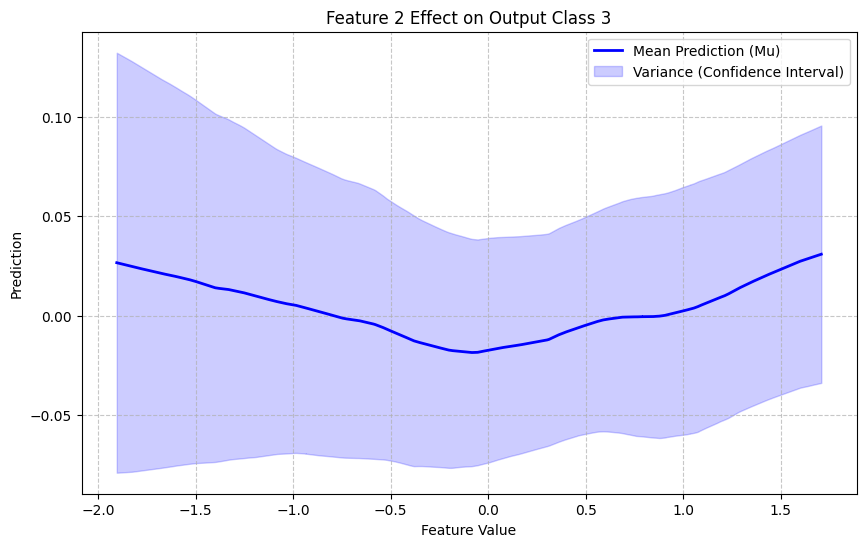

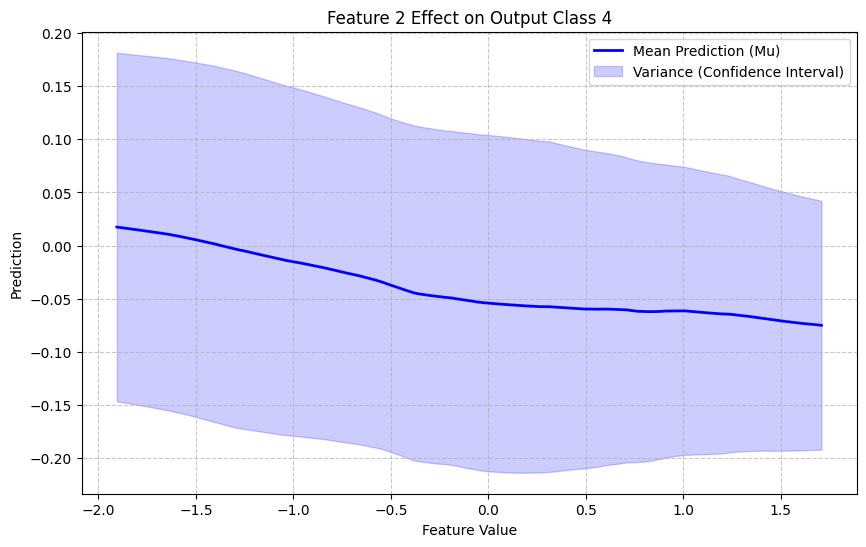

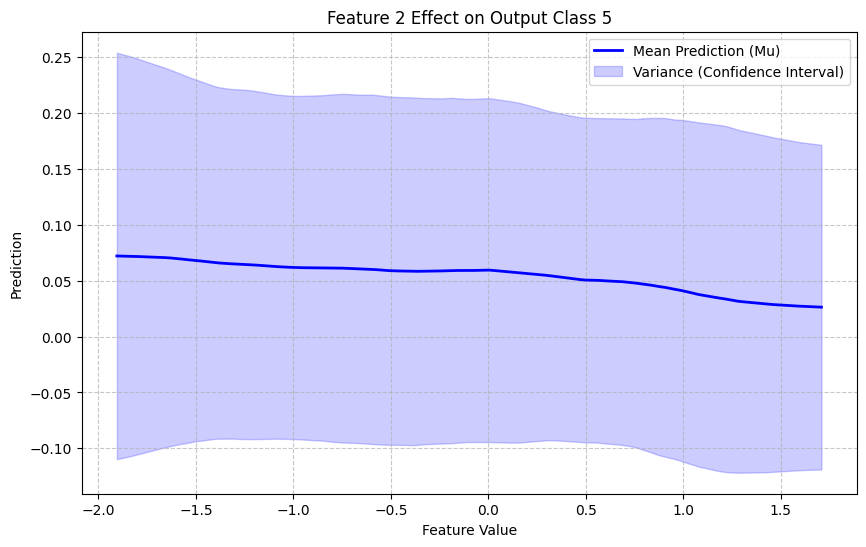

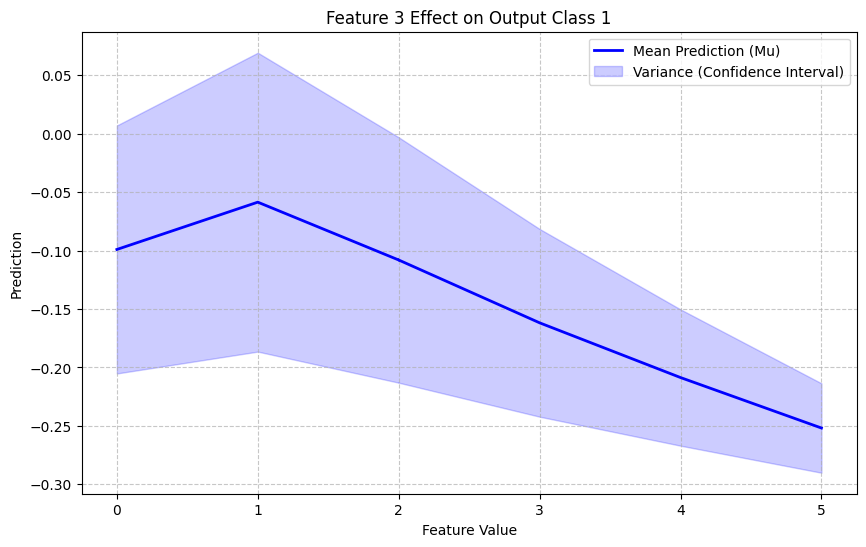

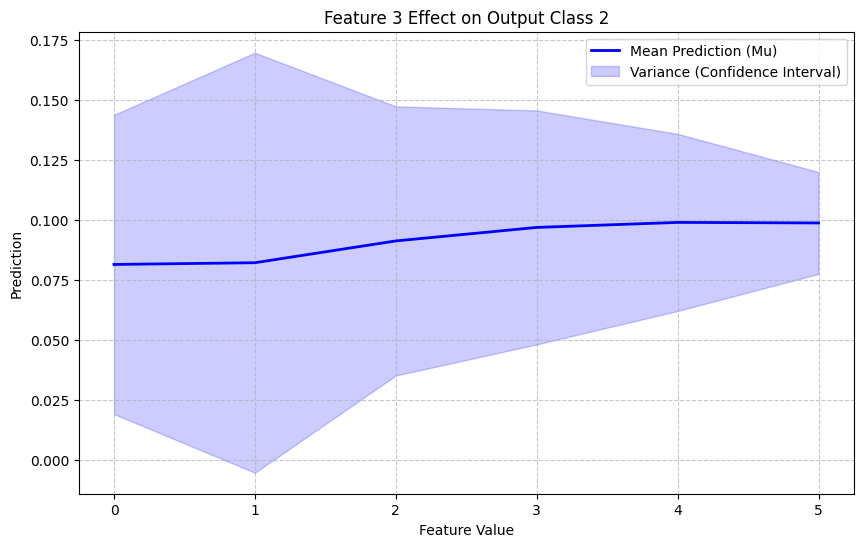

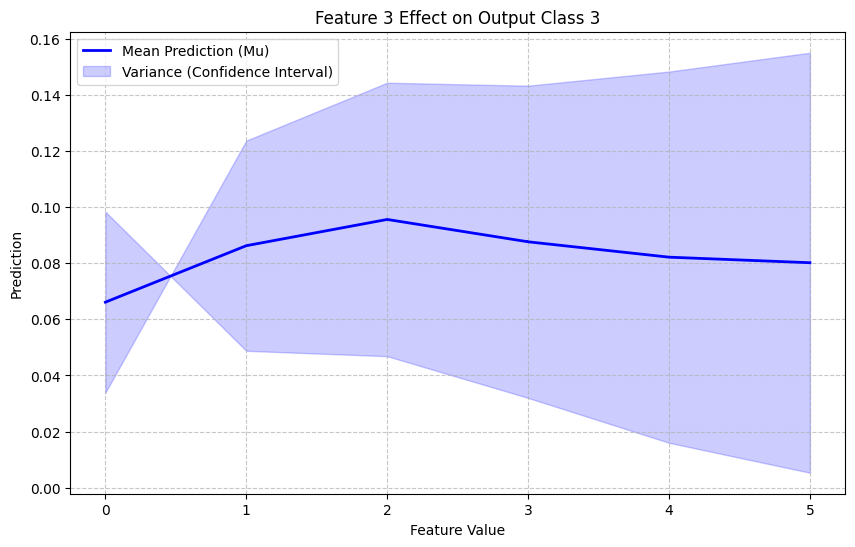

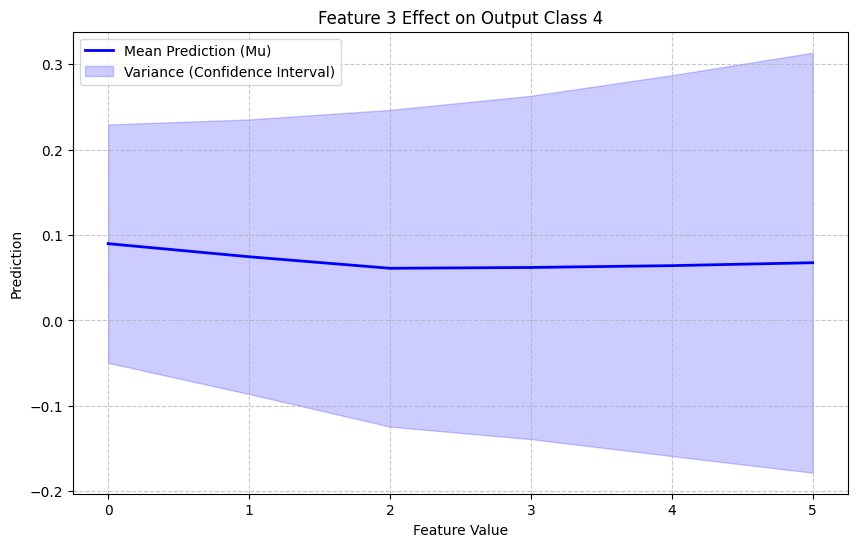

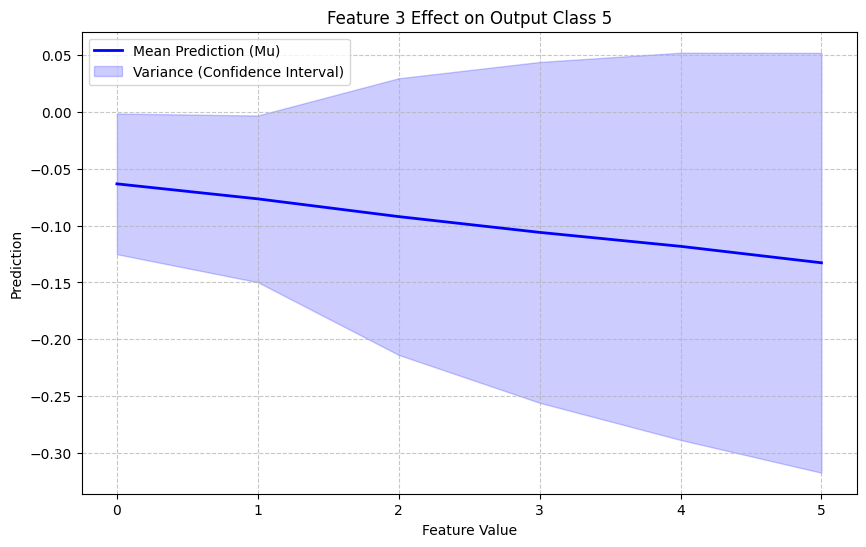

In [ ]:
model.plot()